In [0]:
 # install catboost 
!pip install catboost==0.8.1.1 

     |████████████████████████████████| 33.6MB 2.0MB/s 


In [0]:
# install category_encoders
!pip install category-encoders

     |████████████████████████████████| 92kB 4.2MB/s 


In [0]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


     |████████████████████████████████| 993kB 3.4MB/s 


In [0]:


link = 'https://drive.google.com/open?id=1g95oHIqNLiyibLuYWY4nOyVvSHsFjfSX'
# code to read csv file from google drive to colab
fluff,id = link.split('=')
print (id) # Verify that you have everything after '='


1g95oHIqNLiyibLuYWY4nOyVvSHsFjfSX


In [0]:


link1 = 'https://drive.google.com/open?id=1-87lOFx8P4qfYzSoisT07ijT-dlPWVrA'
# code to read csv file from google drive to colab
fluff,id1 = link1.split('=')
print (id1) # Verify that you have everything after '='


1-87lOFx8P4qfYzSoisT07ijT-dlPWVrA


In [0]:


link2 = 'https://drive.google.com/open?id=1gxA0EzhLbHPjCoCoX15JFY8wprnZwa0b'
# code to read csv file from google drive to colab
fluff,id2 = link2.split('=')
print (id2) # Verify that you have everything after '='


1gxA0EzhLbHPjCoCoX15JFY8wprnZwa0b


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_values.csv')  
data= pd.read_csv('train_values.csv')
#test_data = read_csv()


downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('train_labels.csv')  
label= pd.read_csv('train_labels.csv')
#test_data = read_csv()

downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('test_values.csv')  
test= pd.read_csv('train_values.csv')
#test_data = read_csv()

In [0]:
data['loan_amount'].max()

100878.0

In [0]:
# merge train labels with train data
data = pd.merge(data, label, how = 'inner', on = 'row_id')

In [0]:
data.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

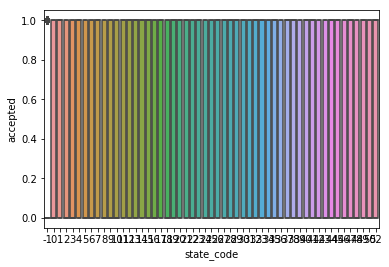

In [0]:
#u = data[data[]
sns.boxplot(x='state_code',y='accepted', data = data)

In [0]:
u = data.loc[data['state_code'] == '48']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
u

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted


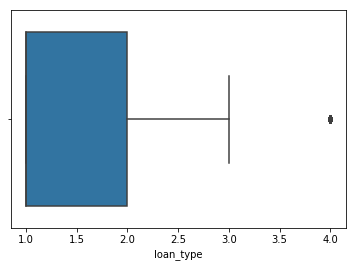

In [0]:
sns.boxplot('loan_type', hue = 'accepted', data= data)

In [0]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,499960,499961,499962,499963,499964,499965,499966,499967,499968,499969,499970,499971,499972,499973,499974,499975,499976,499977,499978,499979,499980,499981,499982,499983,499984,499985,499986,499987,499988,499989,499990,499991,499992,499993,499994,499995,499996,499997,499998,499999
row_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,499960,499961,499962,499963,499964,499965,499966,499967,499968,499969,499970,499971,499972,499973,499974,499975,499976,499977,499978,499979,499980,499981,499982,499983,499984,499985,499986,499987,499988,499989,499990,499991,499992,499993,499994,499995,499996,499997,499998,499999
loan_type,3,1,2,1,1,1,3,2,1,1,1,1,2,1,1,1,1,2,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,4,1,2,4,3,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1
property_type,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1
loan_purpose,1,3,3,1,1,3,1,1,3,3,1,1,3,1,1,3,3,3,1,3,3,1,3,1,1,3,1,2,2,1,3,1,1,1,3,3,1,1,1,1,...,3,3,1,1,3,3,1,1,3,1,3,1,2,1,1,3,3,3,3,3,1,1,3,1,1,1,3,1,3,3,3,1,1,3,2,1,1,1,2,3
occupancy,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1
loan_amount,70,178,163,155,305,133,240,210,209,197,319,187,138,240,151,208,177,138,195,90,111,192,20,764,602,292,113,15,75,368,302,283,51,664,612,168,415,593,88,552,...,173,127,266,60,87,93,99,144,484,96,295,34,42,323,366,181,242,52,172,148,211,134,90,205,194,201,295,171,144,630,190,151,310,200,31,150,140,22,35,71
preapproval,3,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,2,3,3,2,3,1,3,3,2,3,3,3,2,3,3,3,2,1,3,...,3,3,3,3,3,3,2,3,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,1,2,3,3,1,3,3,3,3
msa_md,18,369,16,305,24,221,374,322,24,194,358,154,61,141,281,101,333,-1,214,101,278,197,109,206,389,333,-1,254,175,24,314,91,358,24,25,-1,207,389,-1,318,...,18,188,352,-1,328,154,361,-1,318,-1,371,287,246,356,141,382,281,120,-1,278,374,284,157,221,370,10,114,61,16,395,18,72,156,199,-1,-1,74,-1,367,408
state_code,37,52,10,47,37,13,28,37,37,9,32,44,28,6,2,16,6,37,15,16,2,37,14,30,37,6,-1,48,22,37,3,37,32,37,6,36,41,37,-1,37,...,37,26,41,16,9,44,43,15,37,1,37,5,5,5,6,14,2,0,40,2,28,39,31,13,5,34,4,28,31,37,37,41,47,26,37,-1,47,46,6,28
county_code,246,299,306,180,20,55,131,35,20,20,244,55,3,250,210,313,80,59,180,49,208,3,131,203,180,80,-1,56,35,20,11,321,274,20,163,151,49,180,-1,274,...,56,275,111,92,56,55,2,68,274,75,260,313,260,98,250,115,163,307,134,208,131,129,129,129,124,79,233,3,61,165,246,296,313,45,156,-1,98,131,149,133


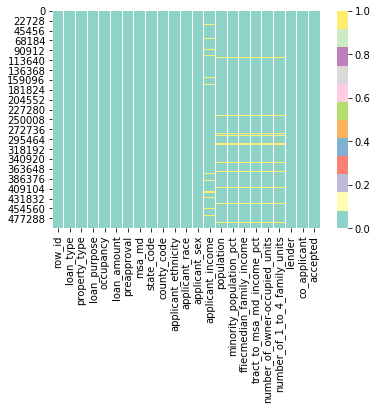

In [0]:
# viz nan of train data
sns.heatmap(data=data.isnull(), cmap='Set3')

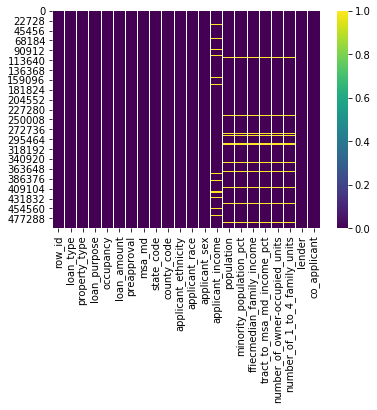

In [0]:
# viz nan of test data
sns.heatmap(data = test.isnull(), cmap = 'viridis')

In [0]:
linD = data['lender']
linT = test['lender']

In [0]:
linD.dtypes

dtype('int64')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [0]:
# this code automatically transform values <= 0 to NaN, which helps to treat the -1 as missing value
# and we recode the NaN to zero using domain knowledge
data = data[data>=1]  


In [0]:
# this code automatically transform values <= 0 to NaN, which helps to treat the -1 as missing value
# and we recode the NaN to zero using domain knowledge
test = test[test>=1]  


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            499999 non-null float64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            422665 non-null float64
state_code                        475638 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           4

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            499999 non-null float64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            422665 non-null float64
state_code                        475638 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           4

In [0]:
data

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,NaN,3,1,1,1,70.0,3,18.0,37.0,246.0,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536.0,NaN,1.0
1,1.0,1,1,3,1,178.0,3,369.0,52.0,299.0,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458.0,NaN,NaN
2,2.0,2,1,3,1,163.0,3,16.0,10.0,306.0,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710.0,NaN,1.0
3,3.0,1,1,1,1,155.0,1,305.0,47.0,180.0,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888.0,1.0,1.0
4,4.0,1,1,1,1,305.0,3,24.0,37.0,20.0,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289.0,NaN,1.0
5,5.0,1,1,3,1,133.0,3,221.0,13.0,55.0,2,5,2,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964.0,NaN,1.0
6,6.0,3,1,1,1,240.0,3,374.0,28.0,131.0,1,5,2,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488.0,NaN,1.0
7,7.0,2,1,1,1,210.0,3,322.0,37.0,35.0,1,5,1,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442.0,1.0,1.0
8,8.0,1,1,3,2,209.0,3,24.0,37.0,20.0,2,5,1,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118.0,1.0,1.0
9,9.0,1,1,3,1,197.0,3,194.0,9.0,20.0,2,5,1,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507.0,NaN,NaN


In [0]:
# fill missing value in the row_id COLUMN of the train data
data['row_id'].fillna(0, inplace = True)

# fill missing value in the row_id COLUMN of data test data
test['row_id'].fillna(0, inplace = True)

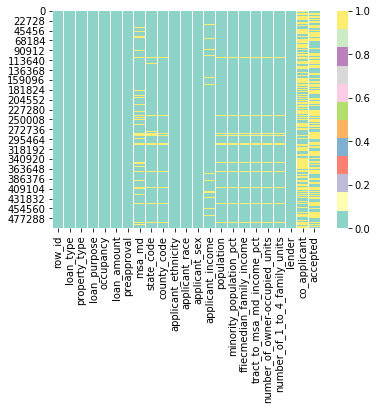

In [0]:
sns.heatmap(data=data.isnull(), cmap = 'Set3')   # visualization of columns with NaN values in the train data

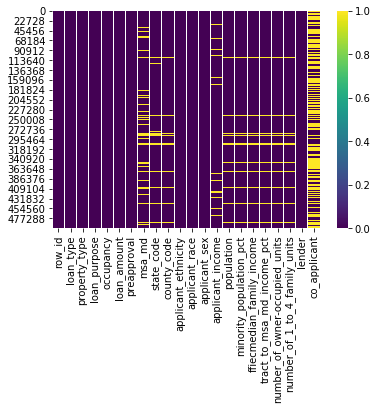

In [0]:
sns.heatmap(data = test.isnull(), cmap = 'viridis')    # visualization of columns with NaN values in the test data

In [0]:
#replace NaN with 0 since it implies zero from the initial stage before cleaning (using the domain knowledge of the data) in the train data
data.co_applicant.fillna(0, inplace = True) 

#replace NaN with 0 since it implies zero from the initial stage before cleaning (using the domain knowledge of the data) in the test data
test.co_applicant.fillna(0, inplace = True)

In [0]:
print(data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null float64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            422665 non-null float64
state_code                        475638 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           4

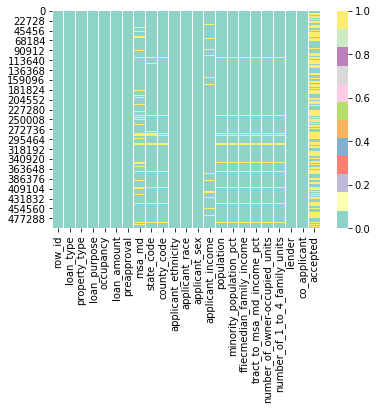

In [0]:
# viz nan in train data
sns.heatmap(data = data.isnull(), cmap= 'Set3')

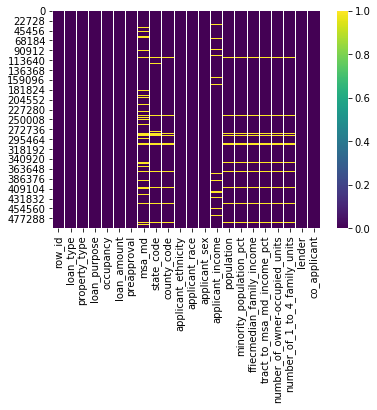

In [0]:
# viz nan in test data
sns.heatmap(data = test.isnull(), cmap= 'viridis')

In [0]:
test.columns 

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant'],
      dtype='object')

In [0]:
data.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [0]:
data.describe() # statistic of train data

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,422665.000000,475638.000000,479534.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477427.000000,477560.000000,477486.000000,477435.000000,477470.000000,499999.000000,500000.000000,250114.0
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,215.017728,24.982432,150.753642,2.036228,4.786586,1.462374,102.389521,5416.833956,31.624201,69235.603298,91.832624,1427.718282,1886.147065,3720.128784,0.400052,1.0
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,124.350767,15.367907,97.647438,0.511351,1.024927,0.677685,153.534496,2728.144999,26.332865,14810.058791,14.210924,737.559511,914.123744,1838.307485,0.489909,0.0
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.004000,17858.000000,3.981000,4.000000,1.000000,1.000000,0.000000,1.0
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,101.000000,9.000000,68.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.707500,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000,1.0
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,225.000000,26.000000,133.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.910000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,0.000000,1.0
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,324.000000,37.000000,248.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.028000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000,1.0
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000,1.0


In [0]:
test.describe() # statistic of test data

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,422665.000000,475638.000000,479534.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477427.000000,477560.000000,477486.000000,477435.000000,477470.000000,499999.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,215.017728,24.982432,150.753642,2.036228,4.786586,1.462374,102.389521,5416.833956,31.624201,69235.603298,91.832624,1427.718282,1886.147065,3720.128784,0.400052
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,124.350767,15.367907,97.647438,0.511351,1.024927,0.677685,153.534496,2728.144999,26.332865,14810.058791,14.210924,737.559511,914.123744,1838.307485,0.489909
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.004000,17858.000000,3.981000,4.000000,1.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,101.000000,9.000000,68.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.707500,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,225.000000,26.000000,133.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.910000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,0.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,324.000000,37.000000,248.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.028000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [0]:
data.applicant_income.describe()

count    460052.000000
mean        102.389521
std         153.534496
min           1.000000
25%          47.000000
50%          74.000000
75%         117.000000
max       10139.000000
Name: applicant_income, dtype: float64

In [0]:
# get the median of the following variables train data
#median_loan_amount = data.loan_amount.median()
median_applicant_income = data.applicant_income.median()
median_tract_to_msa_md_income_pct = data.tract_to_msa_md_income_pct.median()
median_number_of_1_to_4_family = data.number_of_1_to_4_family_units.median()
median_number_of_owner_occupied_units = data['number_of_owner-occupied_units'].median()
median_population = data.population.median()
median_ffiecmedian_family_income = data.ffiecmedian_family_income.median()
median_minority_population_pct = data.minority_population_pct.median()


# get the median of the following variables test data
#median_loan_amount = data.loan_amount.median()
median_applicant_income = test.applicant_income.median()
median_tract_to_msa_md_income_pct = test.tract_to_msa_md_income_pct.median()
median_number_of_1_to_4_family = test.number_of_1_to_4_family_units.median()
median_number_of_owner_occupied_units = test['number_of_owner-occupied_units'].median()
median_population = test.population.median()
median_ffiecmedian_family_income = test.ffiecmedian_family_income.median()
median_minority_population_pct = test.minority_population_pct.median()



# fill the NaNs with median of their respective features or variable in the train data
data.applicant_income.fillna(median_applicant_income,inplace = True)
data.tract_to_msa_md_income_pct.fillna(median_tract_to_msa_md_income_pct,inplace = True)
data.number_of_1_to_4_family_units.fillna(median_number_of_1_to_4_family,inplace = True)
data['number_of_owner-occupied_units'].fillna(median_number_of_owner_occupied_units,inplace = True)
data.population.fillna(median_population,inplace = True)
data.ffiecmedian_family_income.fillna(median_ffiecmedian_family_income, inplace = True)
data.minority_population_pct.fillna(median_minority_population_pct, inplace = True)

# fill the NANs with median of their respective features or variable in the test data
test.applicant_income.fillna(median_applicant_income,inplace = True)
test.tract_to_msa_md_income_pct.fillna(median_tract_to_msa_md_income_pct,inplace = True)
test.number_of_1_to_4_family_units.fillna(median_number_of_1_to_4_family,inplace = True)
test['number_of_owner-occupied_units'].fillna(median_number_of_owner_occupied_units,inplace = True)
test.population.fillna(median_population,inplace = True)
test.ffiecmedian_family_income.fillna(median_ffiecmedian_family_income, inplace = True)
test.minority_population_pct.fillna(median_minority_population_pct, inplace = True)

In [0]:
# forward fill the following features in the train data
''' data.msa_md.fillna(method = 'ffill', inplace = True)
data.state_code.fillna(method = 'ffill', inplace = True)
data.county_code.fillna(method = 'ffill', inplace = True)

# forward fill the following features in the test data
test.msa_md.fillna(method = 'ffill', inplace = True)
test.state_code.fillna(method = 'ffill', inplace = True)
test.county_code.fillna(method = 'ffill', inplace = True)
 '''

data.drop('lender', axis = 1, inplace = True)
test.drop('lender', axis = 1, inplace = True)

In [0]:
#sns.heatmap(data = data.isnull(),yticklabels = True, cmap = 'Set3', cbar = True)
#sns.heatmap(data = data['lender'].isnull(), cmap = 'Set3')


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
row_id                            500000 non-null float64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            422665 non-null float64
state_code                        475638 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           5

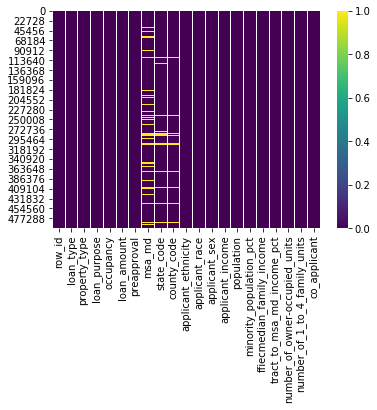

In [0]:
sns.heatmap(data = data.isnull(), cmap = 'viridis')

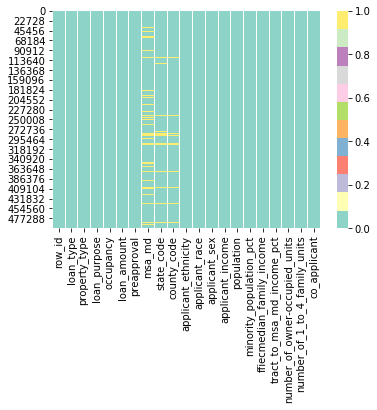

In [0]:
sns.heatmap(data = test.isnull(), cmap = 'Set3')

In [0]:
#sns.heatmap(data = )
data['lender'] = linD
test['lender'] = linT

In [0]:
data.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'co_applicant', 'lender'],
      dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null float64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            422665 non-null float64
state_code                        475638 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           5

In [0]:
# convert columns to the required data type as per the domain knowledge of the data in the train data
data.row_id = data.row_id.astype(np.int)
data.population = data.population.astype(np.int)
data.ffiecmedian_family_income = data.ffiecmedian_family_income.astype(np.int)
data['number_of_owner-occupied_units'] = data['number_of_owner-occupied_units'].astype(np.int)
data.number_of_1_to_4_family_units = data.number_of_1_to_4_family_units.astype(np.int)
data.applicant_income = data.applicant_income.astype(np.int)
data.co_applicant = data.co_applicant.astype(np.int) 
data.loan_amount = data.loan_amount.astype(np.int)
#data.lender = data.lender.astype(np.int)


# convert  columns to the required data type as per the domain knowledge of the data in the test data
test.row_id = test.row_id.astype(np.int)
test.applicant_income = test.applicant_income.astype(np.int)
test.population = test.population.astype(np.int)
test.ffiecmedian_family_income = test.ffiecmedian_family_income.astype(np.int)
test['number_of_owner-occupied_units'] = test['number_of_owner-occupied_units'].astype(np.int)
test.number_of_1_to_4_family_units = test.number_of_1_to_4_family_units.astype(np.int)
test.co_applicant = test.co_applicant.astype(np.int) 
test.loan_amount = test.loan_amount.astype(np.int)
#test.lender = test.lender.astype(np.int)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null int64
preapproval                       500000 non-null int64
msa_md                            422665 non-null float64
state_code                        475638 non-null float64
county_code                       479534 non-null float64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null int64
population                        500000 non-null int64
minority_population_pct           500000 no

In [0]:
data

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,lender
0,0,3,1,1,1,70,3,18.0,37.0,246.0,2,5,1,24,6203,44.230,60588,50.933,716,2642,0,4536
1,1,1,1,3,1,178,3,369.0,52.0,299.0,1,5,1,57,5774,15.905,54821,100.000,1622,2108,0,2458
2,2,2,1,3,1,163,3,16.0,10.0,306.0,2,5,1,67,6094,61.270,67719,100.000,760,1048,0,5710
3,3,1,1,1,1,155,1,305.0,47.0,180.0,2,5,1,105,6667,6.246,78439,100.000,2025,2299,1,5888
4,4,1,1,1,1,305,3,24.0,37.0,20.0,2,3,2,71,6732,100.000,63075,82.200,1464,1847,0,289
5,5,1,1,3,1,133,3,221.0,13.0,55.0,2,5,2,51,6078,4.821,82745,96.550,1827,2340,0,964
6,6,3,1,1,1,240,3,374.0,28.0,131.0,1,5,2,104,6068,26.427,65282,81.068,1863,2560,0,5488
7,7,2,1,1,1,210,3,322.0,37.0,35.0,1,5,1,55,6030,78.153,108353,59.439,969,1601,1,2442
8,8,1,1,3,2,209,3,24.0,37.0,20.0,2,5,1,244,5151,88.156,63414,62.813,411,481,1,2118
9,9,1,1,3,1,197,3,194.0,9.0,20.0,2,5,1,86,7916,24.893,65927,100.000,1861,2123,0,3507


In [0]:
# forward fill the following features in the train data
data.msa_md.fillna(method = 'ffill', inplace = True)
data.state_code.fillna(method = 'ffill', inplace = True)
data.county_code.fillna(method = 'ffill', inplace = True)

# forward fill the following features in the test data
test.msa_md.fillna(method = 'ffill', inplace = True)
test.state_code.fillna(method = 'ffill', inplace = True)
test.county_code.fillna(method = 'ffill', inplace = True)
 

In [0]:
data

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,lender
0,0,3,1,1,1,70,3,18.0,37.0,246.0,2,5,1,24,6203,44.230,60588,50.933,716,2642,0,4536
1,1,1,1,3,1,178,3,369.0,52.0,299.0,1,5,1,57,5774,15.905,54821,100.000,1622,2108,0,2458
2,2,2,1,3,1,163,3,16.0,10.0,306.0,2,5,1,67,6094,61.270,67719,100.000,760,1048,0,5710
3,3,1,1,1,1,155,1,305.0,47.0,180.0,2,5,1,105,6667,6.246,78439,100.000,2025,2299,1,5888
4,4,1,1,1,1,305,3,24.0,37.0,20.0,2,3,2,71,6732,100.000,63075,82.200,1464,1847,0,289
5,5,1,1,3,1,133,3,221.0,13.0,55.0,2,5,2,51,6078,4.821,82745,96.550,1827,2340,0,964
6,6,3,1,1,1,240,3,374.0,28.0,131.0,1,5,2,104,6068,26.427,65282,81.068,1863,2560,0,5488
7,7,2,1,1,1,210,3,322.0,37.0,35.0,1,5,1,55,6030,78.153,108353,59.439,969,1601,1,2442
8,8,1,1,3,2,209,3,24.0,37.0,20.0,2,5,1,244,5151,88.156,63414,62.813,411,481,1,2118
9,9,1,1,3,1,197,3,194.0,9.0,20.0,2,5,1,86,7916,24.893,65927,100.000,1861,2123,0,3507


In [0]:
# convert type to int ib the train data
data.msa_md = data.msa_md.astype(np.int)   
data.state_code = data.state_code.astype(np.int)  
data.county_code = data.county_code.astype(np.int)   
# convert type to int in the test data
test.msa_md = test.msa_md.astype(np.int)   
test.state_code = test.state_code.astype(np.int)  
test.county_code = test.county_code.astype(np.int)



In [0]:
# merge train labels with train data
data = pd.merge(data, label, how = 'inner', on = 'row_id')

In [0]:
data.shape

(500000, 23)

In [0]:
data["minority_population"] = (data["minority_population_pct"] / 100) * data["population"]
data["tract_to_msa_md_income"] = (data["tract_to_msa_md_income_pct"] / 100) * data["ffiecmedian_family_income"]

test["minority_population"] = (test["minority_population_pct"] / 100) * test["population"]
test["tract_to_msa_md_income"] = (test["tract_to_msa_md_income_pct"] / 100) * test["ffiecmedian_family_income"]

In [0]:
data["minority_population"] = data["minority_population"].apply(np.log) 

test["minority_population"] = test["minority_population"].apply(np.log) 


## **feature Selection/ engineering**

In [0]:
data.describe(include = [np.number])

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,lender,accepted,minority_population,tract_to_msa_md_income
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,214.998874,24.985818,150.741876,2.036228,4.786586,1.462374,100.121312,5396.982356,31.230790,69158.876302,92.200385,1423.172866,1880.147458,0.400052,3720.121344,0.500228,6.944215,63649.157096
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,124.420920,15.371345,97.631698,0.511351,1.024927,0.677685,147.474440,2667.723303,25.795118,14478.232811,13.990187,721.027517,893.717989,0.489909,1838.313175,0.500000,1.099209,16229.288602
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.004000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000,0.000000,0.024088,2930.135430
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,101.000000,9.000000,68.000000,2.000000,5.000000,1.000000,49.000000,3805.000000,11.200000,60071.000000,89.145000,963.000000,1323.000000,0.000000,2442.000000,0.000000,6.230644,53618.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,225.000000,26.000000,133.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.910000,67526.000000,100.000000,1327.000000,1753.000000,0.000000,3731.000000,1.000000,7.038584,63501.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,324.000000,37.000000,248.000000,2.000000,5.000000,2.000000,112.000000,6379.000000,44.486000,74714.250000,100.000000,1754.000000,2275.000000,1.000000,5436.000000,1.000000,7.747523,71782.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,1.000000,6508.000000,1.000000,10.140514,125248.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 25 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null int64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null int64
population                        500000 non-null int64
minority_population_pct           500000 non-null

In [0]:
print(data.shape)
print(data.loan_amount.unique().shape)


In [0]:
data.shape
test.shape

In [0]:
numerical_variable = ["loan_amount", "applicant_income", "population", "minority_population_pct", 
                     "ffiecmedian_family_income", "tract_to_msa_md_income_pct", 
                      "number_of_owner-occupied_units", "number_of_1_to_4_family_units"]

In [0]:
sns.distplot(data['minority_population'], kde = True, rug = True)


In [0]:
sns.distplot(data['minority_population'], kde = True, rug = True)

In [0]:
'''
new_applicant_race = { 1:'American Indian or Alaska Native',
                       2:'Asian', 
                       3:'Black or African American',
                       4:'Native Hawaiian or Other Pacific Islander',
                       5:'White',
                       6:'No_info_7_8',
                       7: 'new_info'}
data['applicant_race'] = [new_applicant_race [x] for x in data['applicant_race']]
data['applicant_race'].value_counts()
'''
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(data['applicant_race'], 'applicant_race')

In [0]:
data.shape

In [0]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(data['applicant_income'], 'applicant_income')

In [0]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(data['applicant_ethnicity'], 'applicant_ethnicity') 

In [0]:
data.columns

In [0]:
def freq_table(data, x):
  for i in  x:
    print(i)
    print(data[i].value_counts())
cols = ['applicant_ethnicity', 'applicant_race', 'applicant_sex','applicant_income']
freq_table(data,cols)        

In [0]:
'''CountryName = {'Australia':'Australia',
                           'Germany':'Europe',
                           'United Kingdom':'Europe', 
                           'France':'Europe',
                           'Canada':'N_america',
                           'United States': 'America'} 
test_file['CountryRegionName'] = [CountryName[x] for x in test_file['CountryRegionName'] ]
test_file['CountryRegionName'].value_counts() 



1 -- American Indian or Alaska Native
2 -- Asian
3 -- Black or African American
4 -- Native Hawaiian or Other Pacific Islander
5 -- White
6 -- Information not provided by applicant in mail, Internet, or telephone application
7 -- Not applicable
8 -- No co-applicant  '''

In [0]:
#Ltype = {1:'American Indian or Alaska Native'}

In [0]:
data.applicant_sex.value_counts()

from the  above  figures, 92% of the data provided their info's, while 8% do not give their info. 
decision :
it is better to remove the the rows with un_specified info 

In [0]:
from collections import Counter
in_keys = Counter(data.applicant_income).keys()
in_val = Counter(data.applicant_income).values()



In [0]:
unique = pd.DataFrame(in_keys,in_val)# columns=['income_keys','income_values'])

In [0]:
unique.T

In [0]:
'''['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted']'''

In [0]:
#data.applicant_income.unique().tolist()

In [0]:
#len(data[data['applicant_income'==24]].unique().tolist())
#len(data[data['applicant_income']==24].unique().tolist())



In [0]:
data.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'co_applicant', 'lender', 'accepted', 'minority_population',
       'tract_to_msa_md_income'],
      dtype='object')

In [0]:
data.shape

(500000, 25)

In [0]:
#data['applicant_race_2']

In [0]:
#from google.colab import drive
#drive.mount('drive')

In [0]:
#data.to_csv('fdata.csv', index = False)

In [0]:
data.columns

In [0]:
cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval','applicant_ethnicity','applicant_race','applicant_sex']


In [0]:
data = pd.get_dummies(data,columns = cols)
test = pd.get_dummies(test, columns = cols)

In [0]:
data.columns

Index(['row_id', 'loan_amount', 'msa_md', 'state_code', 'county_code',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'co_applicant', 'lender', 'accepted', 'minority_population',
       'tract_to_msa_md_income', 'loan_type_1', 'loan_type_2', 'loan_type_3',
       'loan_type_4', 'property_type_1', 'property_type_2', 'property_type_3',
       'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_3', 'occupancy_1',
       'occupancy_2', 'occupancy_3', 'preapproval_1', 'preapproval_2',
       'preapproval_3', 'applicant_ethnicity_1', 'applicant_ethnicity_2',
       'applicant_ethnicity_3', 'applicant_ethnicity_4', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'applicant_race_6', 'applicant_race_7',
       'applicant_sex_1', 'applicant_sex_2', 'applicant_sex_3',


In [0]:
data.shape

(500000, 48)

In [0]:
# ethinic
data['Hispanic_or_Latino'] = data['applicant_ethnicity_1']
data['Not Hispanic or Latino'] = data['applicant_ethnicity_2']
data['No_ethinic_info'] = data['applicant_ethnicity_3']

# Race
data['American_Indian_or_Alaska_Native'] = data['applicant_race_1']
data['Asian'] = data['applicant_race_2']
data['Black_or_African_American']= data['applicant_race_3']
data['Native_Hawaiian_or_Other_Pacific_Islander'] = data['applicant_race_4']
data['White'] = data['applicant_race_5']
data['No_race_info'] = data['applicant_race_6']

 #loan Type
data['Conventional'] = data['loan_type_1']
data['FHA-insured'] = data['loan_type_2']
data['VA-guaranteed'] = data['loan_type_3']
data['FSA/RHS'] = data['loan_type_4']

# property Type
data ['One_to_four_family'] = data['property_type_1']
data['Manufactured_housing'] = data['property_type_2']
data['Multifamily'] = data['property_type_3']

#occupancy
data['Owner_occupied_as_a_principal_dwelling'] = data['occupancy_1']
data['Not_owner_occupied']  = data['occupancy_2']
data['Occupancy_Not_applicable']= data['occupancy_3']

#preapproval_1
data['Preapproval_was_requested'] =  data['preapproval_1']
data['Preapproval_was_not_requested'] = data['preapproval_2']
data['Preapproval_Not_applicable'] = data['preapproval_3']

# applicant_sex
data['Male'] = data['applicant_sex_1']
data['Female'] = data['applicant_sex_2']
data['No_sex_info'] =data['applicant_sex_3']
data['sex_Not_applicable'] =  data['applicant_sex_4']

#loan_purpose
data['Home_purchase'] = data['loan_purpose_1']
data['Home_improvement'] = data['loan_purpose_2']
data['Refinancing'] = data['loan_purpose_3']

In [0]:
# ethinic
test['Hispanic_or_Latino'] = test['applicant_ethnicity_1']
test['Not Hispanic or Latino'] = test['applicant_ethnicity_2']
test['No_ethinic_info'] = test['applicant_ethnicity_3']

# Race
test['American_Indian_or_Alaska_Native'] = test['applicant_race_1']
test['Asian'] = test['applicant_race_2']
test['Black_or_African_American']= test['applicant_race_3']
test['Native_Hawaiian_or_Other_Pacific_Islander'] = test['applicant_race_4']
test['White'] = test['applicant_race_5']
test['No_race_info'] = test['applicant_race_6']

 #loan Type
test['Conventional'] = test['loan_type_1']
test['FHA-insured'] = test['loan_type_2']
test['VA-guaranteed'] = test['loan_type_3']
test['FSA/RHS'] = test['loan_type_4']

# property Type
test ['One_to_four_family'] = test['property_type_1']
test['Manufactured_housing'] = test['property_type_2']
test['Multifamily'] = test['property_type_3']

#occupancy
test['Owner_occupied_as_a_principal_dwelling'] = test['occupancy_1']
test['Not_owner_occupied']  = test['occupancy_2']
test['Occupancy_Not_applicable']= test['occupancy_3']

#preapproval_1
test['Preapproval_was_requested'] =  test['preapproval_1']
test['Preapproval_was_not_requested'] = test['preapproval_2']
test['Preapproval_Not_applicable'] = test['preapproval_3']

# applicant_sex
test['Male'] = test['applicant_sex_1']
test['Female'] = test['applicant_sex_2']
test['No_sex_info'] =test['applicant_sex_3']
test['sex_Not_applicable'] =  test['applicant_sex_4']

#loan_purpose
test['Home_purchase'] = test['loan_purpose_1']
test['Home_improvement'] = test['loan_purpose_2']
test['Refinancing'] = test['loan_purpose_3']

In [0]:
data.columns

Index(['row_id', 'loan_amount', 'msa_md', 'state_code', 'county_code',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'co_applicant', 'lender', 'accepted', 'minority_population',
       'tract_to_msa_md_income', 'loan_type_1', 'loan_type_2', 'loan_type_3',
       'loan_type_4', 'property_type_1', 'property_type_2', 'property_type_3',
       'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_3', 'occupancy_1',
       'occupancy_2', 'occupancy_3', 'preapproval_1', 'preapproval_2',
       'preapproval_3', 'applicant_ethnicity_1', 'applicant_ethnicity_2',
       'applicant_ethnicity_3', 'applicant_ethnicity_4', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'applicant_race_6', 'applicant_race_7',
       'applicant_sex_1', 'applicant_sex_2', 'applicant_sex_3',


In [0]:
data.drop(['loan_type_1', 'loan_type_2',
       'loan_type_3', 'loan_type_4', 'property_type_1', 'property_type_2',
       'property_type_3', 'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_3',
       'occupancy_1', 'occupancy_2', 'occupancy_3', 'preapproval_1',
       'preapproval_2', 'preapproval_3', 'applicant_ethnicity_1',
       'applicant_ethnicity_2', 'applicant_ethnicity_3',
       'applicant_ethnicity_4', 'applicant_race_1', 'applicant_race_2',
       'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
       'applicant_race_6', 'applicant_race_7', 'applicant_sex_1',
       'applicant_sex_2', 'applicant_sex_3', 'applicant_sex_4'],axis = 1, inplace = True)
test.drop(['loan_type_1', 'loan_type_2',
       'loan_type_3', 'loan_type_4', 'property_type_1', 'property_type_2',
       'property_type_3', 'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_3',
       'occupancy_1', 'occupancy_2', 'occupancy_3', 'preapproval_1',
       'preapproval_2', 'preapproval_3', 'applicant_ethnicity_1',
       'applicant_ethnicity_2', 'applicant_ethnicity_3',
       'applicant_ethnicity_4', 'applicant_race_1', 'applicant_race_2',
       'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
       'applicant_race_6', 'applicant_race_7', 'applicant_sex_1',
       'applicant_sex_2', 'applicant_sex_3', 'applicant_sex_4'],axis = 1, inplace = True)

In [0]:
data.columns

Index(['row_id', 'loan_amount', 'msa_md', 'state_code', 'county_code',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'co_applicant', 'lender', 'accepted', 'minority_population',
       'tract_to_msa_md_income', 'Hispanic_or_Latino',
       'Not Hispanic or Latino', 'No_ethinic_info',
       'American_Indian_or_Alaska_Native', 'Asian',
       'Black_or_African_American',
       'Native_Hawaiian_or_Other_Pacific_Islander', 'White', 'No_race_info',
       'Conventional', 'FHA-insured', 'VA-guaranteed', 'FSA/RHS',
       'One_to_four_family', 'Manufactured_housing', 'Multifamily',
       'Owner_occupied_as_a_principal_dwelling', 'Not_owner_occupied',
       'Occupancy_Not_applicable', 'Preapproval_was_requested',
       'Preapproval_was_not_requested', 'Preapproval_Not_applicable', 'Male',
       'Female', 'No_sex_info', 's

In [0]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,499960,499961,499962,499963,499964,499965,499966,499967,499968,499969,499970,499971,499972,499973,499974,499975,499976,499977,499978,499979,499980,499981,499982,499983,499984,499985,499986,499987,499988,499989,499990,499991,499992,499993,499994,499995,499996,499997,499998,499999
row_id,0.000000,1.000000,2.00000,3.000000,4.000000,5.000000,6.00000,7.000000,8.000000,9.000000,10.00000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.00000,20.000000,21.000000,22.000000,23.000000,24.00000,25.000000,26.000000,27.00000,28.00000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,...,499960.00000,499961.00000,499962.000000,499963.000000,499964.000000,499965.000000,499966.000000,499967.000000,499968.000000,499969.000000,499970.00000,499971.000000,499972.000000,499973.000000,499974.000000,499975.000000,499976.000000,499977.000000,499978.00000,499979.00000,499980.000000,499981.00000,499982.000000,499983.000000,499984.000000,499985.000000,499986.000000,499987.000000,499988.000000,499989.000000,499990.000000,499991.000000,499992.000000,499993.00000,499994.000000,499995.000000,499996.000000,499997.000000,499998.000000,499999.000000
loan_amount,70.000000,178.000000,163.00000,155.000000,305.000000,133.000000,240.00000,210.000000,209.000000,197.000000,319.00000,187.000000,138.000000,240.000000,151.000000,208.000000,177.000000,138.000000,195.000000,90.00000,111.000000,192.000000,20.000000,764.000000,602.00000,292.000000,113.000000,15.00000,75.00000,368.000000,302.000000,283.000000,51.000000,664.000000,612.000000,168.000000,415.000000,593.000000,88.000000,552.000000,...,173.00000,127.00000,266.000000,60.000000,87.000000,93.000000,99.000000,144.000000,484.000000,96.000000,295.00000,34.000000,42.000000,323.000000,366.000000,181.000000,242.000000,52.000000,172.00000,148.00000,211.000000,134.00000,90.000000,205.000000,194.000000,201.000000,295.000000,171.000000,144.000000,630.000000,190.000000,151.000000,310.000000,200.00000,31.000000,150.000000,140.000000,22.000000,35.000000,71.000000
msa_md,18.000000,369.000000,16.00000,305.000000,24.000000,221.000000,374.00000,322.000000,24.000000,194.000000,358.00000,154.000000,61.000000,141.000000,281.000000,101.000000,333.000000,333.000000,214.000000,101.00000,278.000000,197.000000,109.000000,206.000000,389.00000,333.000000,333.000000,254.00000,175.00000,24.000000,314.000000,91.000000,358.000000,24.000000,25.000000,25.000000,207.000000,389.000000,389.000000,318.000000,...,18.00000,188.00000,352.000000,352.000000,328.000000,154.000000,361.000000,361.000000,318.000000,318.000000,371.00000,287.000000,246.000000,356.000000,141.000000,382.000000,281.000000,120.000000,120.00000,278.00000,374.000000,284.00000,157.000000,221.000000,370.000000,10.000000,114.000000,61.000000,16.000000,395.000000,18.000000,72.000000,156.000000,199.00000,199.000000,199.000000,74.000000,74.000000,367.000000,408.000000
state_code,37.000000,52.000000,10.00000,47.000000,37.000000,13.000000,28.00000,37.000000,37.000000,9.000000,32.00000,44.000000,28.000000,6.000000,2.000000,16.000000,6.000000,37.000000,15.000000,16.00000,2.000000,37.000000,14.000000,30.000000,37.00000,6.000000,6.000000,48.00000,22.00000,37.000000,3.000000,37.000000,32.000000,37.000000,6.000000,36.000000,41.000000,37.000000,37.000000,37.000000,...,37.00000,26.00000,41.000000,16.000000,9.000000,44.000000,43.000000,15.000000,37.000000,1.000000,37.00000,5.000000,5.000000,5.000000,6.000000,14.000000,2.000000,2.000000,40.00000,2.00000,28.000000,39.00000,31.000000,13.000000,5.000000,34.000000,4.000000,28.000000,31.000000,37.000000,37.000000,41.000000,47.000000,26.00000,37.000000,37.000000,47.000000,46.000000,6.000000,28.000000
county_code,246.000000,299.000000,306.00000,180.000000,20.000000,55.000000,131.00000,35.000000,20.000000,20.000000,244.00000,55.000000,3.000000,250.000000,21

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 46 columns):
row_id                                       500000 non-null int64
loan_amount                                  500000 non-null int64
msa_md                                       500000 non-null int64
state_code                                   500000 non-null int64
county_code                                  500000 non-null int64
applicant_income                             500000 non-null int64
population                                   500000 non-null int64
minority_population_pct                      500000 non-null float64
ffiecmedian_family_income                    500000 non-null int64
tract_to_msa_md_income_pct                   500000 non-null float64
number_of_owner-occupied_units               500000 non-null int64
number_of_1_to_4_family_units                500000 non-null int64
co_applicant                                 500000 non-null int64
lender        

Text(0.5, 1.0, 'Correlation Matrix')

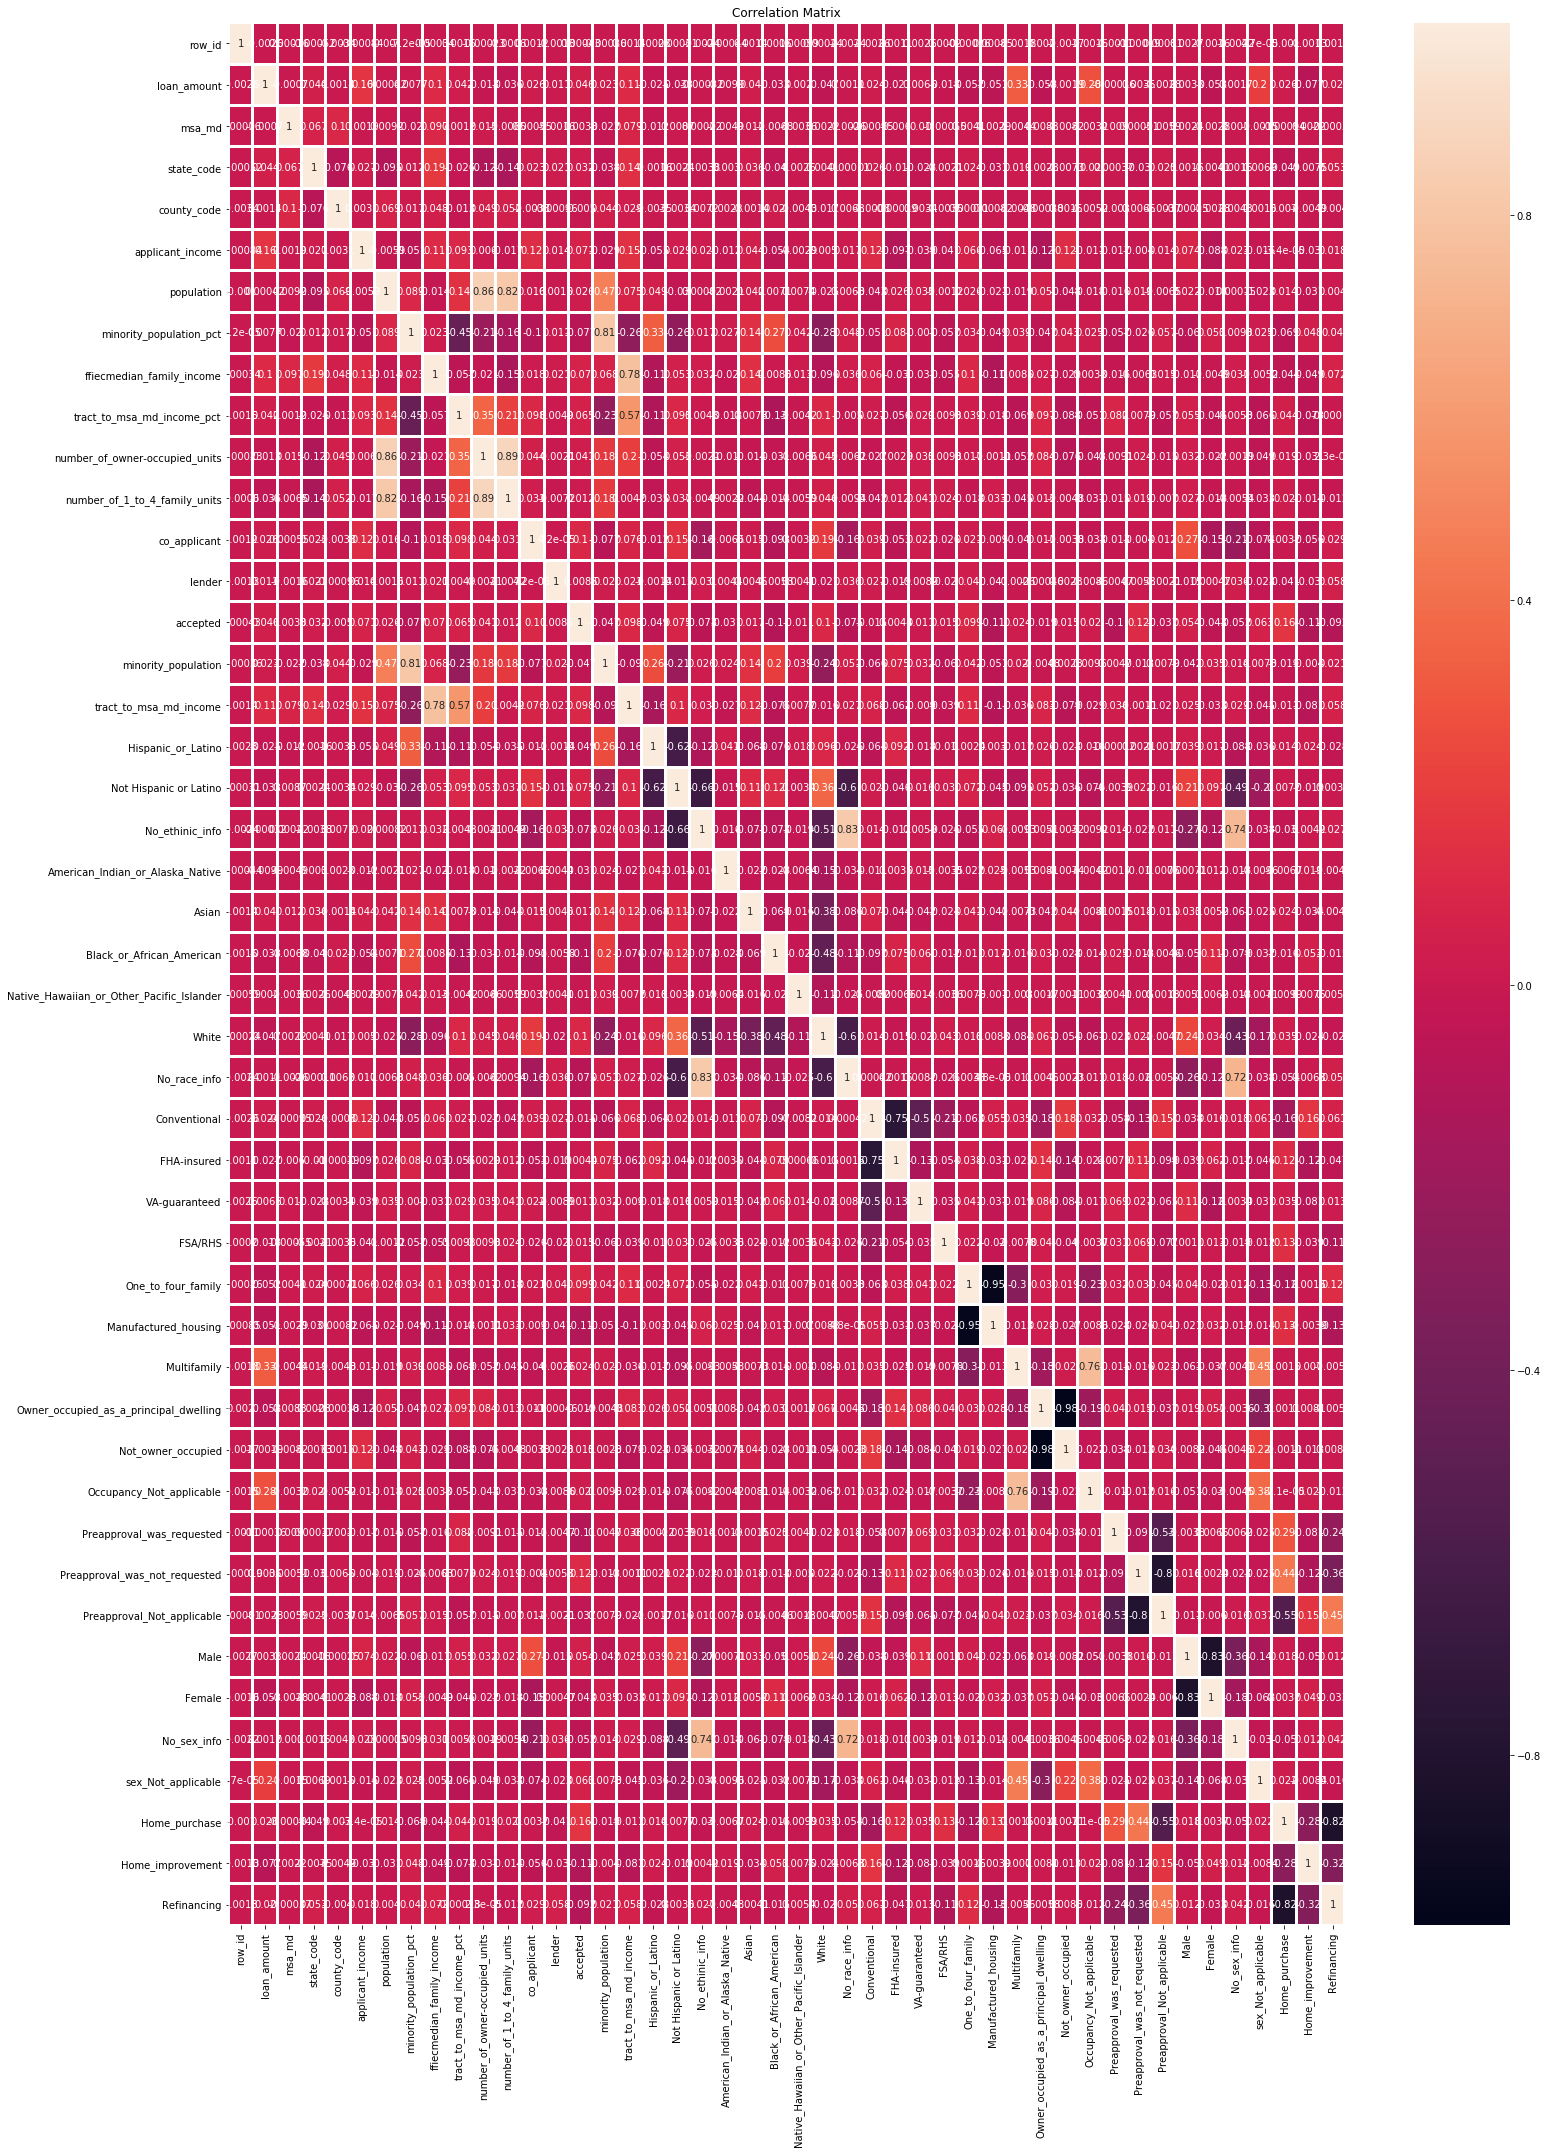

In [0]:
f,ax=plt.subplots(figsize=(25,35))
sns.heatmap(data.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [0]:
print('this\nme')

this
me


In [0]:
import sklearn 
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms
from sklearn import preprocessing
import sklearn.metrics as sklm
from sklearn import linear_model
import numpy.random as nr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

labelencoder = LabelEncoder() 

X = data [['Hispanic_or_Latino',
       'Not Hispanic or Latino', 'No_ethinic_info',
       'American_Indian_or_Alaska_Native', 'Asian',
       'Black_or_African_American',
       'Native_Hawaiian_or_Other_Pacific_Islander', 'White', 'No_race_info',
       'Conventional', 'FHA-insured', 'VA-guaranteed', 'FSA/RHS',
       'One_to_four_family', 'Manufactured_housing', 'Multifamily',
       'Owner_occupied_as_a_principal_dwelling', 'Not_owner_occupied',
       'Occupancy_Not_applicable', 'Preapproval_was_requested',
       'Preapproval_was_not_requested', 'Preapproval_Not_applicable', 'Male',
       'Female', 'No_sex_info', 'sex_Not_applicable', 'Home_purchase',
       'Home_improvement', 'Refinancing','ffiecmedian_family_income','number_of_owner-occupied_units',
       'number_of_1_to_4_family_units','co_applicant',  'state_code','county_code', 
       'Hispanic_or_Latino', 'Not Hispanic or Latino', 'No_ethinic_info','minority_population','tract_to_msa_md_income','lender']] #lender, minority_population_pct, tract_to_msa_md_income_pct, 
#X = data[['HomeOwnerFlag','NumberCarsOwned','YearlyIncome','Age','Male','Female','Single','Married','America','Australia','North America','Europe','Graduate','High School','Undergraduate','Clerical','Management','Manual','Professional','Skilled Manaul']]
y = data['accepted']

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=222)
#X_train, X_test, y_train, y_test = train_test_split(train_encoded, label["accepted"], test_size=0.4, random_state=222)

In [0]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

70.00% in training set
30.00% in test set


In [0]:
cat_boost_feat = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 
                  'applicant_ethnicity','applicant_race', 'applicant_sex', 'co_applicant', 
                  'state_code','county_code', 'lender']

In [0]:
test_doc = test [['Hispanic_or_Latino',
       'Not Hispanic or Latino', 'No_ethinic_info',
       'American_Indian_or_Alaska_Native', 'Asian',
       'Black_or_African_American',
       'Native_Hawaiian_or_Other_Pacific_Islander', 'White', 'No_race_info',
       'Conventional', 'FHA-insured', 'VA-guaranteed', 'FSA/RHS',
       'One_to_four_family', 'Manufactured_housing', 'Multifamily',
       'Owner_occupied_as_a_principal_dwelling', 'Not_owner_occupied',
       'Occupancy_Not_applicable', 'Preapproval_was_requested',
       'Preapproval_was_not_requested', 'Preapproval_Not_applicable', 'Male',
       'Female', 'No_sex_info', 'sex_Not_applicable', 'Home_purchase',
       'Home_improvement', 'Refinancing','ffiecmedian_family_income','number_of_owner-occupied_units',
       'number_of_1_to_4_family_units','co_applicant', 'state_code','county_code',
       'Hispanic_or_Latino', 'Not Hispanic or Latino', 'No_ethinic_info','minority_population','tract_to_msa_md_income','lender']]

In [0]:
print(X_train.shape)
print(test_doc.shape)

(350000, 41)
(500000, 41)


**Scale Data**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#test_doc = scaler.transform(test_doc) 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
#data['lender'].dtypes

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = logmodel.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive     48594             26429
Actual negative     27617             47360

Accuracy        0.64
AUC             0.69
Macro precision 0.64
Macro recall    0.64
 
           Positive      Negative
Num case    75023         74977
Precision    0.64          0.64
Recall       0.65          0.63
F1           0.64          0.64


In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [0]:
gbr=GradientBoostingClassifier (max_depth=5)
gbr.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

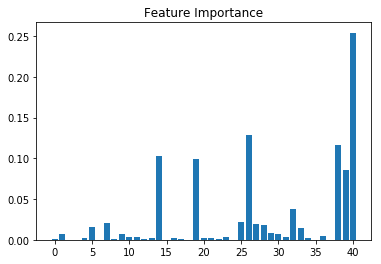

In [0]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.title('Feature Importance')
plt.show()

In [0]:
probabilities = gbr.predict_proba(X_test)
print_metrics( y_test, probabilities,0.5 )

                 Confusion matrix
                 Score positive    Score negative
Actual positive     46494             28529
Actual negative     18475             56502

Accuracy        0.69
AUC             0.75
Macro precision 0.69
Macro recall    0.69
 
           Positive      Negative
Num case    75023         74977
Precision    0.72          0.66
Recall       0.62          0.75
F1           0.66          0.71


In [0]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
probabilities = xgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     47284             27739
Actual negative     21001             53976

Accuracy        0.68
AUC             0.74
Macro precision 0.68
Macro recall    0.68
 
           Positive      Negative
Num case    75023         74977
Precision    0.69          0.66
Recall       0.63          0.72
F1           0.66          0.69


In [0]:
import lightgbm as lgb

In [0]:
lgb = lgb.LGBMClassifier()

lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
probabilities = lgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     45747             29276
Actual negative     17189             57788

Accuracy        0.69
AUC             0.76
Macro precision 0.70
Macro recall    0.69
 
           Positive      Negative
Num case    75023         74977
Precision    0.73          0.66
Recall       0.61          0.77
F1           0.66          0.71


In [0]:
def cat_type():
  for i in cat_boost_feat:
    print (i)
    
    print(type(cat_boost_feat[0]))
    print('\n')
cat_type()

loan_type
<class 'str'>


property_type
<class 'str'>


loan_purpose
<class 'str'>


occupancy
<class 'str'>


preapproval
<class 'str'>


applicant_ethnicity
<class 'str'>


applicant_race
<class 'str'>


applicant_sex
<class 'str'>


co_applicant
<class 'str'>


state_code
<class 'str'>


county_code
<class 'str'>


lender
<class 'str'>




In [0]:
# pull off
clf = CatBoostClassifier(iterations=2000, random_seed=20181224, learning_rate=0.01, 
                             depth=6, l2_leaf_reg=3) # silent=True,
clf.fit(X_train, y_train )#, cat_features = cat_boost_feat)
pred = clf.predict(X_test)
print(f"{accuracy_score(y_test, pred)}")

0:	learn: 0.6912003	total: 475ms	remaining: 15m 49s
1:	learn: 0.6893129	total: 904ms	remaining: 15m 2s
2:	learn: 0.6874833	total: 1.34s	remaining: 14m 54s
3:	learn: 0.6857101	total: 1.77s	remaining: 14m 41s
4:	learn: 0.6839918	total: 2.2s	remaining: 14m 38s
5:	learn: 0.6823269	total: 2.62s	remaining: 14m 31s
6:	learn: 0.6807140	total: 3.06s	remaining: 14m 30s
7:	learn: 0.6791515	total: 3.48s	remaining: 14m 27s
8:	learn: 0.6776381	total: 3.91s	remaining: 14m 24s
9:	learn: 0.6761721	total: 4.35s	remaining: 14m 25s
10:	learn: 0.6747416	total: 4.81s	remaining: 14m 29s
11:	learn: 0.6733651	total: 5.24s	remaining: 14m 27s
12:	learn: 0.6720233	total: 5.66s	remaining: 14m 24s
13:	learn: 0.6707308	total: 6.09s	remaining: 14m 24s
14:	learn: 0.6694788	total: 6.52s	remaining: 14m 22s
15:	learn: 0.6682659	total: 6.94s	remaining: 14m 21s
16:	learn: 0.6670806	total: 7.38s	remaining: 14m 20s
17:	learn: 0.6659287	total: 7.8s	remaining: 14m 18s
18:	learn: 0.6648236	total: 8.24s	remaining: 14m 18s
19:	le

In [0]:
import catboost as catb


In [0]:
catb = catb.CatBoostClassifier()

In [0]:
catb.predict(test_doc)

CatboostError: ignored

In [0]:
solution =clf.predict(test_doc)

In [0]:
submit = pd.DataFrame({'row_id':test.row_id, 'accepted':solution})
submit.to_csv('catbooostcap.csv',index = False)

In [0]:
from google.colab import files
files.download('catbooostcap.csv')

In [0]:
model = CatBoostClassifier( ) #silent=True)

In [0]:
probabilities = lgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [0]:
pti

NameError: ignored